In [207]:
#Import a plotting libraries and a maths library 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

r = np.linspace(0.01,3.0,num=500) # Make a radius vector
#epsilon = 1 # Energy minimum
sigma = 0.15 # Distance to zero crossing point
#E_LJ = 4*epsilon*((sigma/r)**12-(sigma/r)**6) # Lennard-Jones potential


In [208]:
def Compute_Forces(pos,acc,epsilon,BoxSize,DIM,N):
    Sij = np.zeros(DIM)
    Rij = np.zeros(DIM)
    acc = np.zeros([N,DIM])
    for i in range(N-1):
        for j in range(i+1,N):
            Sij = pos[i,:]-pos[j,:]
            
            for l in range(DIM):
                if (np.abs(Sij[l])>0.5):
                    Sij[l] = Sij[l]-np.copysign(1,Sij[l])
            
            Rij = BoxSize*Sij
            
            Rsqij = np.dot(Rij,Rij)
            
            if (Rsqij<Rcutoff**2):
                r2 = 1/0.02
                r6 = r2**2
                r12 = r6**3
                dphi = epsilon*24*r2*(2*sigma**12*r12-sigma**6*r6)
                
                acc[i,:] = acc[i,:]+dphi*Sij
                acc[j,:] = acc[j,:]-dphi*Sij#
    
    return acc                

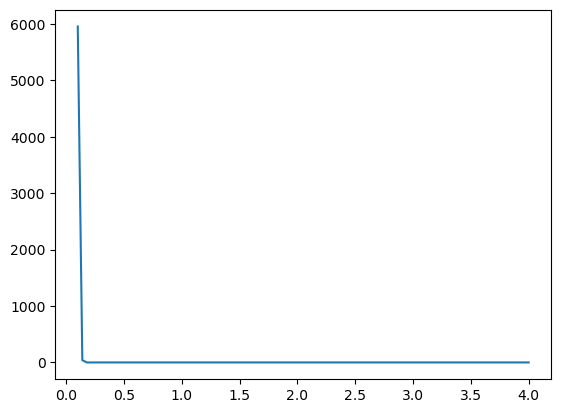

In [209]:
r = np.linspace(0.1,4,100)
d_phi = epsilon*24*1/r**2*(2*sigma**12/r**12-sigma**6/r**6)
#plt.ylim([-10,10])
plt.plot(r,d_phi)

In [210]:
epsilon

0.01

In [211]:
DIM = 2
nx = 6
N = nx**2
epsilon = 0.01
BoxSize = 5
Rcutoff = 2



vol = BoxSize**DIM
#pos = np.random.rand(N,DIM)*BoxSize
x = np.linspace(0, 0.9, nx)
#pos,_ = np.meshgrid(x,x)*BoxSize
pos = np.zeros([nx**2,DIM])
for i in range(nx):
    for j in range(nx):
        pos[i+nx*j] = [x[i]*BoxSize,x[j]*BoxSize]

In [212]:
pos

array([[0. , 0. ],
       [0.9, 0. ],
       [1.8, 0. ],
       [2.7, 0. ],
       [3.6, 0. ],
       [4.5, 0. ],
       [0. , 0.9],
       [0.9, 0.9],
       [1.8, 0.9],
       [2.7, 0.9],
       [3.6, 0.9],
       [4.5, 0.9],
       [0. , 1.8],
       [0.9, 1.8],
       [1.8, 1.8],
       [2.7, 1.8],
       [3.6, 1.8],
       [4.5, 1.8],
       [0. , 2.7],
       [0.9, 2.7],
       [1.8, 2.7],
       [2.7, 2.7],
       [3.6, 2.7],
       [4.5, 2.7],
       [0. , 3.6],
       [0.9, 3.6],
       [1.8, 3.6],
       [2.7, 3.6],
       [3.6, 3.6],
       [4.5, 3.6],
       [0. , 4.5],
       [0.9, 4.5],
       [1.8, 4.5],
       [2.7, 4.5],
       [3.6, 4.5],
       [4.5, 4.5]])

In [223]:
Nsteps = 1000
dt = 10/1000
T=1e-2
def main(pos,Nsteps,dt,epsilon,BoxSize,DIM):
    fig = plt.figure(figsize = (4,4), dpi=150)
    ims = [None for i in range(Nsteps)]
    vel = (np.random.randn(N,DIM)-0.5)
    acc = (np.zeros([N,DIM]))
    E = np.zeros(Nsteps+1)
    E[0] = 0*sum([sum(vel[i,:]**2) for i in range(N)])
    vel = 0*vel
    for k in range(Nsteps):
        #for i in range(DIM):
         #   period = np.where(pos[:,i] > 0.5)
          #  pos[period,i]=pos[period,i]-1.0
           # period = np.where(pos[:,i] < -0.5)
            #pos[period,i]=pos[period,i]+1.0
            
        pos = (pos + dt*vel + 0.5*dt**2*acc)%BoxSize
        
        #chi = np.sqrt(T/E[k])
        vel = vel +1/2*dt*acc
        
        acc = Compute_Forces(pos,acc,epsilon,BoxSize,DIM,N)
        
        vel = vel + 1/2*dt*acc
        
        im = [plt.scatter(pos[:,0],pos[:,1],color='b') ]
        ims[k] = im
        E[k+1] = 1/2*sum([sum(vel[i,:]**2) for i in range(N)])
    plt.grid()
    plt.xlim([0,1*BoxSize])
    plt.ylim([0,1*BoxSize])
    plt.title("Molecular Dynamics")
    plt.rcParams["animation.html"]= 'html5'
    ani = animation.ArtistAnimation(fig,ims,interval = 100)
    plt.close
    
    return ani,E
    
        
        

In [224]:
from matplotlib import cm
from matplotlib import animation

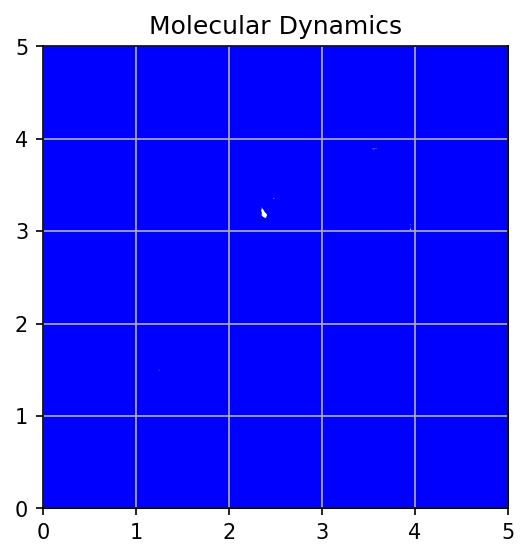

In [225]:
a = main(pos,Nsteps,dt,epsilon,BoxSize,DIM)

In [226]:
a[0]

Text(0.5, 1.0, 'Kinetic energy vs iteration.')

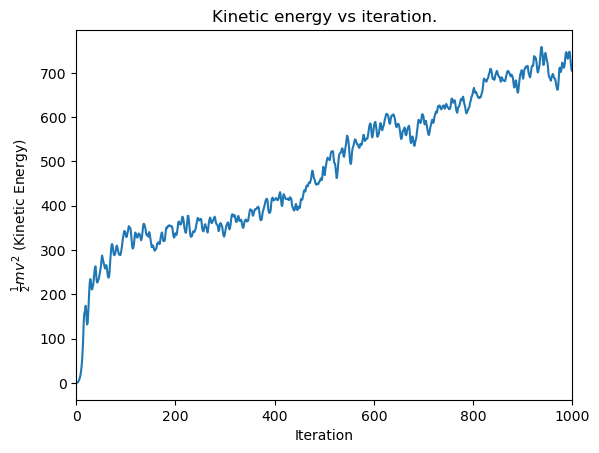

In [227]:
plt.plot(a[1])
plt.xlim([0,1000])
#plt.ylim([0,2])
plt.xlabel("Iteration")
plt.ylabel(r"$\frac{1}{2}mv^2$ (Kinetic Energy)")
plt.title("Kinetic energy vs iteration.")

In [ ]:
plt.plot(a[1])

In [ ]:
fig = plt.figure(figsize = (4,4), dpi=150)
ims = [None for i in range(1000)]
#plt.plot(x_plot,rho_inf_vals,color='r')
for a in range(1000):
    
    im = [plt.scatter(pos_save[:,:,a][:,0],pos_save[:,:,a][:,1],color='b') ]
    
    ims[a] = im
plt.grid()
plt.title("Evolution of SDE dynamics and equilibrium solution, $\gamma$=1")
plt.rcParams["animation.html"]= 'html5'
ani = animation.ArtistAnimation(fig,ims,interval = 100)
plt.close()

In [ ]:
pos[1,:]-pos[2,:]

In [ ]:
Sij[1]-np.copysign(1,Sij[1])